In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Importing Dataset
netflix_df = pd.read_csv("netflix_titles.csv") 

In [4]:
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
#Data Cleaning
print(netflix_df.isnull().any())

show_id         False
type            False
title           False
director         True
cast             True
country          True
date_added       True
release_year    False
rating           True
duration         True
listed_in       False
description     False
dtype: bool


In [6]:
netflix_df.T.apply(lambda x: x.isnull().sum(), axis = 1)

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [7]:
netflix_df.isnull().sum().sum()

4307

In [8]:
#Replacing missing values
netflix_df.director.fillna("No Director", inplace=True)
netflix_df.cast.fillna("No Cast", inplace=True)
netflix_df.country.fillna("Country Unavailable", inplace=True)
netflix_df.dropna(subset=["date_added", "rating"], inplace=True)
netflix_df.duration.fillna("No Duration", inplace=True)

In [9]:
netflix_df.isnull().any()

show_id         False
type            False
title           False
director        False
cast            False
country         False
date_added      False
release_year    False
rating          False
duration        False
listed_in       False
description     False
dtype: bool

In [10]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8793 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8793 non-null   object
 1   type          8793 non-null   object
 2   title         8793 non-null   object
 3   director      8793 non-null   object
 4   cast          8793 non-null   object
 5   country       8793 non-null   object
 6   date_added    8793 non-null   object
 7   release_year  8793 non-null   int64 
 8   rating        8793 non-null   object
 9   duration      8793 non-null   object
 10  listed_in     8793 non-null   object
 11  description   8793 non-null   object
dtypes: int64(1), object(11)
memory usage: 893.0+ KB


In [11]:
netflix_df["date_added"] = pd.to_datetime(netflix_df['date_added'])
netflix_df['day_added'] = netflix_df['date_added'].dt.day
netflix_df['year_added'] = netflix_df['date_added'].dt.year
netflix_df['month_added']=netflix_df['date_added'].dt.month
netflix_df['year_added'].astype(int);
netflix_df['day_added'].astype(int);

In [12]:
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,day_added,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Cast,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",25,2021,9
1,s2,TV Show,Blood & Water,No Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24,2021,9
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Country Unavailable,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,24,2021,9
3,s4,TV Show,Jailbirds New Orleans,No Director,No Cast,Country Unavailable,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",24,2021,9
4,s5,TV Show,Kota Factory,No Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,24,2021,9


In [13]:
#Checking for Duplicate values
netflix_df.duplicated().sum()

0

In [14]:
#Checking for unique values
netflix_df["type"].unique()

array(['Movie', 'TV Show'], dtype=object)

In [15]:
netflix_df["rating"].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR',
       'TV-Y7-FV', 'UR'], dtype=object)

In [16]:
netflix_df["release_year"].unique()

array([2020, 2021, 1993, 2018, 1996, 1998, 1997, 2010, 2013, 2017, 1975,
       1978, 1983, 1987, 2012, 2001, 2014, 2002, 2003, 2004, 2011, 2008,
       2009, 2007, 2005, 2006, 1994, 2015, 2019, 2016, 1982, 1989, 1990,
       1991, 1999, 1986, 1992, 1984, 1980, 1961, 2000, 1995, 1985, 1976,
       1959, 1988, 1981, 1972, 1964, 1945, 1954, 1979, 1958, 1956, 1963,
       1970, 1973, 1925, 1974, 1960, 1966, 1971, 1962, 1969, 1977, 1967,
       1968, 1965, 1946, 1942, 1955, 1944, 1947, 1943], dtype=int64)

In [17]:
netflix_df["listed_in"].nunique()

513

In [18]:
netflix_df["type"].value_counts()

Movie      6129
TV Show    2664
Name: type, dtype: int64

In [19]:
%matplotlib inline

sns.set_style("darkgrid")
matplotlib.rcParams["font.size"] = 14
matplotlib.rcParams["figure.facecolor"] = '#00000000'

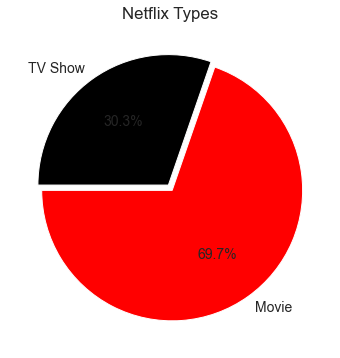

In [20]:
plt.figure(figsize=(12,6))
plt.title("Netflix Types")
g = plt.pie(netflix_df.type.value_counts(),explode=(0.025,0.025), labels=netflix_df.type.value_counts().index, colors=['red','black'],autopct='%1.1f%%', startangle=180)
plt.show()

C:\Users\Kanimozhi\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='type', ylabel='count'>

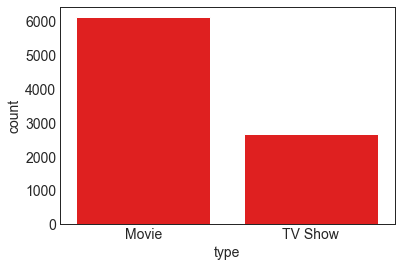

In [28]:
sns.set_style("white")

sns.countplot(netflix_df["type"],color ='red')

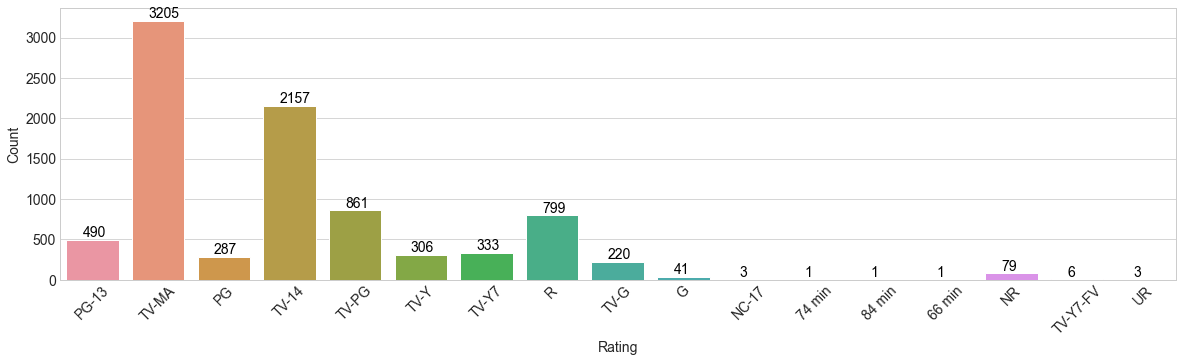

In [29]:
#Ratings in each category for movies and TV shows
plt.figure(figsize = (20, 5))
plt.style.use('seaborn-whitegrid')
ax = sns.countplot(x = 'rating', data = netflix_df)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation = 45)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va = 'bottom', color = 'black')

<AxesSubplot:>

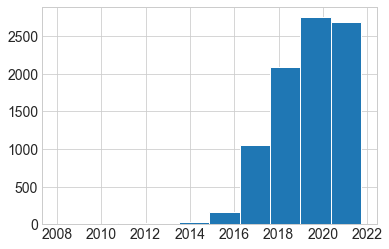

In [30]:
#Movies/TV shows added each year
netflix_df["date_added"].hist()

In [35]:
#Movies/TV Shows released each year


In [36]:
#Movies made in India
Indian_movies = netflix_df[(netflix_df["type"] == "Movie") & (netflix_df["country"] == "India")]["title"]

In [37]:
Indian_movies.count()

893

In [38]:
Indian_movies.unique()

array(['Jeans', 'Angamaly Diaries', 'Anjaam', 'Dhanak', 'Gurgaon',
       'Shikara', 'Thimmarusu', 'C Kkompany',
       'EMI: Liya Hai To Chukana Padega', 'Koi Aap Sa', 'Krishna Cottage',
       'Kucch To Hai', 'Kyaa Kool Hai Hum', 'Kyaa Kool Hain Hum 3',
       'Kyaa Super Kool Hain Hum', 'Kyo Kii... Main Jhuth Nahin Bolta',
       'LSD: Love, Sex Aur Dhokha',
       'Mission Istaanbul: Darr Ke Aagey Jeet Hai',
       'Once Upon a Time in Mumbaai',
       'Once Upon a Time in Mumbai Dobaara!', 'Ragini MMS',
       'Ragini MMS 2', 'Shootout at Lokhandwala', 'Shor In the City',
       'The Dirty Picture', 'Bombay', 'Chennai Express', 'Department',
       'Chhota Bheem And The Broken Amulet', 'Chhota Bheem aur Krishna',
       'Har Kisse Ke Hisse: Kaamyaab', 'Rehmataan', 'Truckbhar Swapna',
       'Ujala', 'Haseen Dillruba', 'Sarbath', '99 Songs',
       'Sardar Ka Grandson', 'Ahaan', 'Cinema Bandi',
       'Tottaa Pataaka Item Maal', 'Nayattu', 'Milestone',
       'Time to Dance', 'The 

In [40]:
netflix_df["date_added"].dt.month

0        9
1        9
2        9
3        9
4        9
        ..
8802    11
8803     7
8804    11
8805     1
8806     3
Name: date_added, Length: 8793, dtype: int64

In [41]:
netflix_df["date_added_month"] = netflix_df["date_added"].dt.month.fillna(-1)
netflix_df["date_added_month"].unique()

array([ 9,  8,  7,  6,  5,  4,  3,  2,  1, 12, 11, 10], dtype=int64)

In [42]:
netflix_df["date_added_month"] = netflix_df["date_added_month"].astype("Int64")
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8793 entries, 0 to 8806
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   show_id           8793 non-null   object        
 1   type              8793 non-null   object        
 2   title             8793 non-null   object        
 3   director          8793 non-null   object        
 4   cast              8793 non-null   object        
 5   country           8793 non-null   object        
 6   date_added        8793 non-null   datetime64[ns]
 7   release_year      8793 non-null   int64         
 8   rating            8793 non-null   object        
 9   duration          8793 non-null   object        
 10  listed_in         8793 non-null   object        
 11  description       8793 non-null   object        
 12  day_added         8793 non-null   int64         
 13  year_added        8793 non-null   int64         
 14  month_added       8793 n

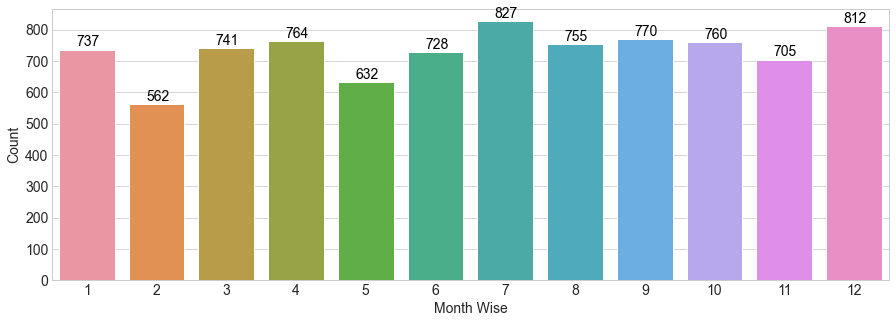

In [44]:
#Number of movies/TV shows added month wise
plt.figure(figsize = (15, 5))
ax = sns.countplot(x = 'date_added_month', data = netflix_df)
plt.xlabel('Month Wise')
plt.ylabel('Count')
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va = 'bottom', color = 'black')

In [45]:
country_count = netflix_df.copy()
country_count = pd.concat([country_count, netflix_df["country"].str.split(",", expand = True)], axis = 1)
country_count

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,2,3,4,5,6,7,8,9,10,11
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Cast,United States,2021-09-25,2020,PG-13,90 min,...,None,None,None,None,None,None,None,None,None,None
1,s2,TV Show,Blood & Water,No Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,...,None,None,None,None,None,None,None,None,None,None
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Country Unavailable,2021-09-24,2021,TV-MA,1 Season,...,None,None,None,None,None,None,None,None,None,None
3,s4,TV Show,Jailbirds New Orleans,No Director,No Cast,Country Unavailable,2021-09-24,2021,TV-MA,1 Season,...,None,None,None,None,None,None,None,None,None,None
4,s5,TV Show,Kota Factory,No Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,...,None,None,None,None,None,None,None,None,None,None
8803,s8804,TV Show,Zombie Dumb,No Director,No Cast,Country Unavailable,2019-07-01,2018,TV-Y7,2 Seasons,...,None,None,None,None,None,None,None,None,None,None
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,...,None,None,None,None,None,None,None,None,None,None
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,...,None,None,None,None,None,None,None,None,None,None


In [46]:
country_count = country_count.melt(id_vars = ["type", "title"], value_vars = range(12), value_name = "country")
country_count = country_count[country_count["country"].notna()]
country_count

C:\Users\KANIMO~1\AppData\Local\Temp/ipykernel_17656/3713054496.py:1: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  country_count = country_count.melt(id_vars = ["type", "title"], value_vars = range(12), value_name = "country")


,type,title,variable,country
0,Movie,Dick Johnson Is Dead,0,United States
1,TV Show,Blood & Water,0,South Africa
2,TV Show,Ganglands,0,Country Unavailable
3,TV Show,Jailbirds New Orleans,0,Country Unavailable
4,TV Show,Kota Factory,0,India
...,...,...,...,...
78733,Movie,The Look of Silence,8,Germany
85367,Movie,Barbecue,9,Sweden
87526,Movie,The Look of Silence,9,Netherlands
94160,Movie,Barbecue,10,United States


In [49]:
country_count["country"].nunique()

198

In [50]:
country_count["country"].value_counts()[:10]

United States          3205
India                  1008
Country Unavailable     829
United Kingdom          627
 United States          479
Canada                  271
Japan                   257
France                  212
South Korea             211
Spain                   181
Name: country, dtype: int64

In [52]:
country_count["country"] = country_count["country"].str.strip()

In [53]:
country_count["country"].value_counts()[:10]

United States          3684
India                  1046
Country Unavailable     829
United Kingdom          805
Canada                  445
France                  393
Japan                   316
Spain                   232
South Korea             231
Germany                 226
Name: country, dtype: int64

<AxesSubplot:xlabel='country'>

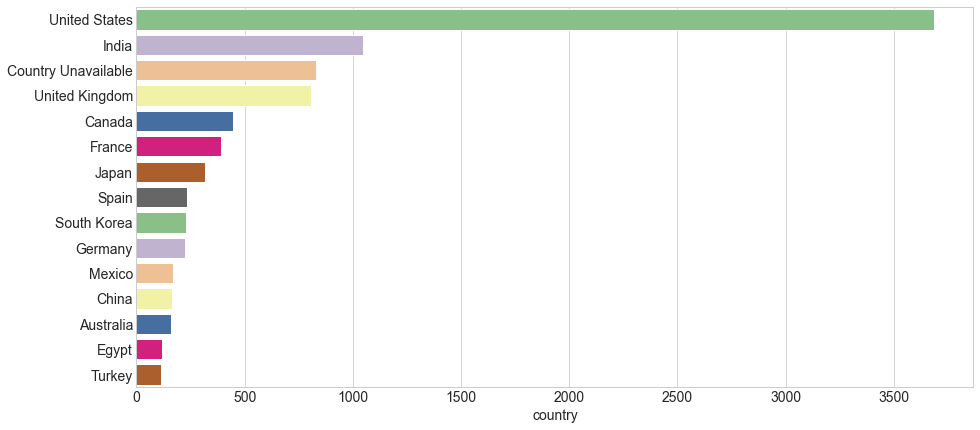

In [64]:
#Top 15 countries with most number of movies/TV shows
plt.figure(figsize = (15, 7))
country = country_count["country"].value_counts()[:15]
sns.barplot(x = country, y = country.index, palette = "Accent")

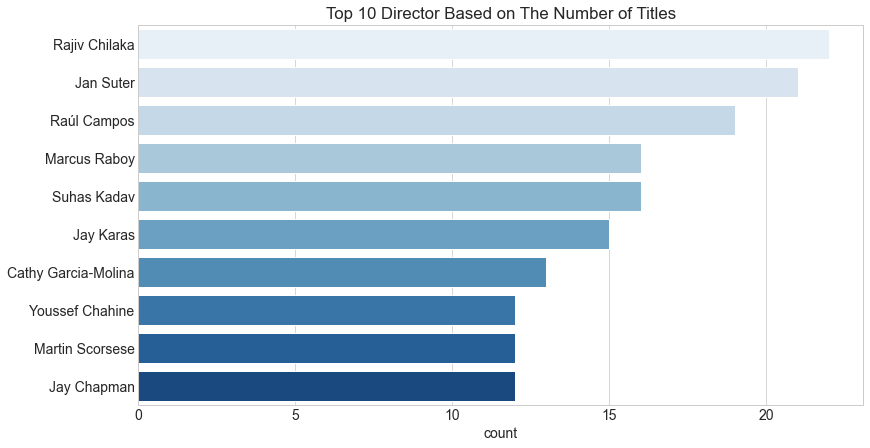

In [59]:
#Top 10 Directors
filtered_directors = netflix_df[netflix_df.director != 'No Director'].set_index('title').director.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(13,7))
plt.title('Top 10 Director Based on The Number of Titles')
sns.countplot(y = filtered_directors, order=filtered_directors.value_counts().index[:10], palette='Red')
plt.show()

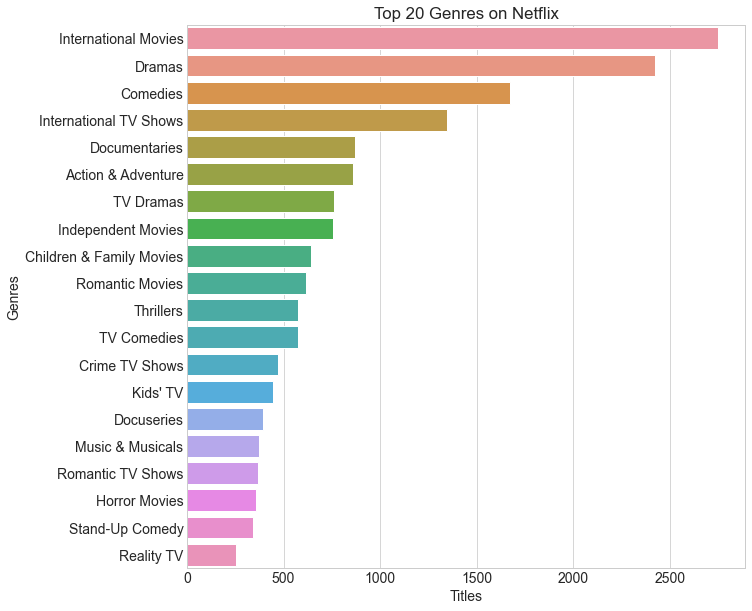

In [63]:
#Top 20 Genres
filtered_genres = netflix_df.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
plt.figure(figsize=(10,10))
g = sns.countplot(y = filtered_genres, order=filtered_genres.value_counts().index[:20])
plt.title('Top 20 Genres on Netflix')
plt.xlabel('Titles')
plt.ylabel('Genres')
plt.show()

In [65]:
cast_count = netflix_df.copy()
cast_count = pd.concat([cast_count, netflix_df["cast"].str.split(",", expand = True)], axis = 1)
cast_count

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,40,41,42,43,44,45,46,47,48,49
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Cast,United States,2021-09-25,2020,PG-13,90 min,...,None,None,None,None,None,None,None,None,None,None
1,s2,TV Show,Blood & Water,No Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,...,None,None,None,None,None,None,None,None,None,None
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Country Unavailable,2021-09-24,2021,TV-MA,1 Season,...,None,None,None,None,None,None,None,None,None,None
3,s4,TV Show,Jailbirds New Orleans,No Director,No Cast,Country Unavailable,2021-09-24,2021,TV-MA,1 Season,...,None,None,None,None,None,None,None,None,None,None
4,s5,TV Show,Kota Factory,No Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,...,None,None,None,None,None,None,None,None,None,None
8803,s8804,TV Show,Zombie Dumb,No Director,No Cast,Country Unavailable,2019-07-01,2018,TV-Y7,2 Seasons,...,None,None,None,None,None,None,None,None,None,None
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,...,None,None,None,None,None,None,None,None,None,None
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,...,None,None,None,None,None,None,None,None,None,None


In [66]:
cast_count = cast_count.melt(id_vars = ["type", "title"], value_vars = range(50), value_name = "cast")
cast_count = cast_count[cast_count["cast"].notna()]
cast_count

C:\Users\KANIMO~1\AppData\Local\Temp/ipykernel_17656/2999997813.py:1: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  cast_count = cast_count.melt(id_vars = ["type", "title"], value_vars = range(50), value_name = "cast")


,type,title,variable,cast
0,Movie,Dick Johnson Is Dead,0,No Cast
1,TV Show,Blood & Water,0,Ama Qamata
2,TV Show,Ganglands,0,Sami Bouajila
3,TV Show,Jailbirds New Orleans,0,No Cast
4,TV Show,Kota Factory,0,Mayur More
...,...,...,...,...
417045,TV Show,Black Mirror,47,Jon Hamm
423918,TV Show,Social Distance,48,Ayize Ma'at
425838,TV Show,Black Mirror,48,Oona Chaplin
432711,TV Show,Social Distance,49,Lovie Simone


In [67]:
cast_count["cast"].nunique()

39250

In [70]:
top_listed_in=netflix_df["listed_in"].value_counts()[0:25]
top_listed_in.head()

Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
Name: listed_in, dtype: int64

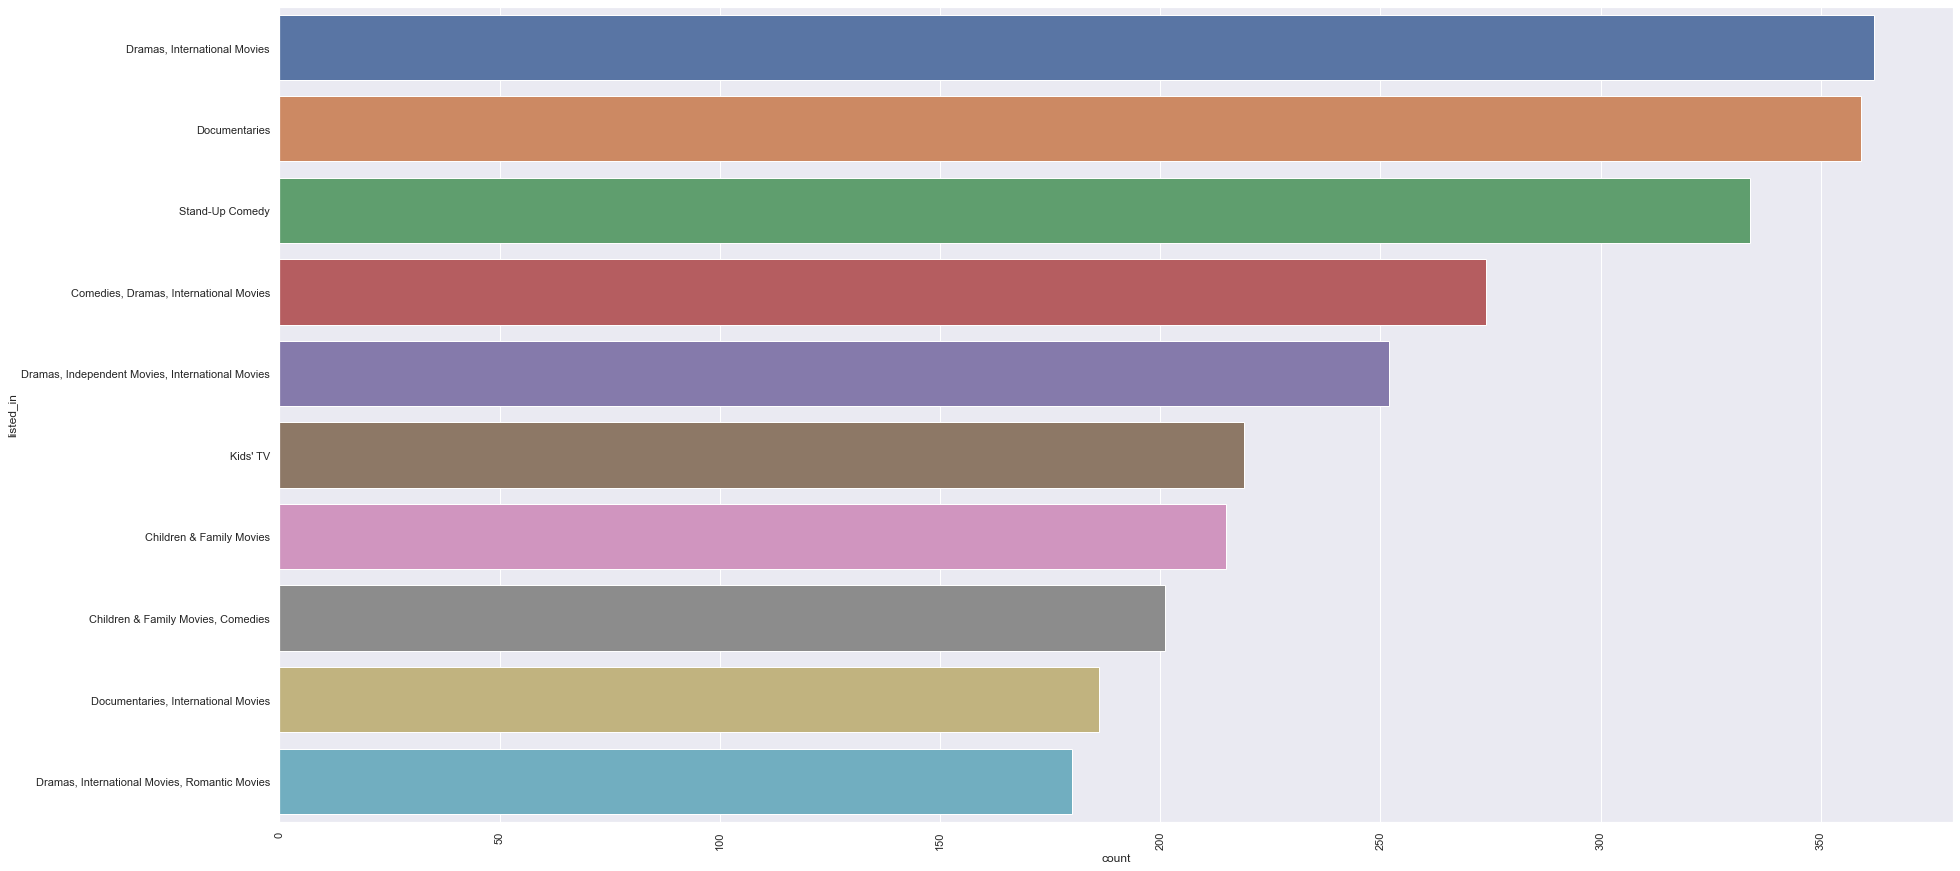

In [76]:
sns.set()
plt.figure(figsize=(30,15))
sns.countplot(y='listed_in',data = netflix_df,order =netflix_df["listed_in"].value_counts().index[0:10])
plt.xticks(rotation = 90)
plt.show()